<a href="https://colab.research.google.com/github/Namyalg/Topic-Modeling/blob/master/COVID_title_final_groupwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import string
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import csv
from csv import reader
tit = []
with open("/content/COVID-19_title.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        tit.append(row)

In [ ]:
print(len(tit))

242108


In [ ]:
print(tit[:1000])

[['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia'], ['nitric oxide pro-inflammatory mediator lung diseas'], ['surfactant protein-d pulmonary host defens'], ['role endothelin-1 lung diseas'], ['gene expression epithelial cells response pneumovirus infect'], ['sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi'], ['debate transfusing normal haemoglobin levels improve outcom'], ['21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001'], ['heme oxygenase-1 carbon monoxide pulmonary medicin'], ['technical description rods real-time public health surveillance system'], ['conservation polyamine regulation translational frameshifting yeast mamm'], ['heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus'], ['method identify domain interacting protein'], ['vaccinia virus infection disrupts microtubule organization centrosome f

In [ ]:
val = []
for i in tit:
  val.append(i[0])

In [ ]:
print(val[:100])

['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia', 'nitric oxide pro-inflammatory mediator lung diseas', 'surfactant protein-d pulmonary host defens', 'role endothelin-1 lung diseas', 'gene expression epithelial cells response pneumovirus infect', 'sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi', 'debate transfusing normal haemoglobin levels improve outcom', '21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001', 'heme oxygenase-1 carbon monoxide pulmonary medicin', 'technical description rods real-time public health surveillance system', 'conservation polyamine regulation translational frameshifting yeast mamm', 'heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus', 'method identify domain interacting protein', 'vaccinia virus infection disrupts microtubule organization centrosome funct', 'site origin 1918 in

In [ ]:


tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = val
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    texts.append(tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]



In [ ]:

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, id2word = dictionary, passes=180)

In [ ]:
#passes 80
top6 = ldamodel.print_topics(num_topics=6, num_words=7)

c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.015*"clinical" + 0.015*"review" + 0.014*"china" + 0.013*"patients" + 0.011*"case" + 0.010*"health" + 0.009*"studi"')
Topic 2
(1, '0.069*"coronavirus" + 0.042*"respiratory" + 0.029*"disease" + 0.025*"2019" + 0.023*"acute" + 0.019*"syndrome" + 0.019*"severe"')
Topic 3
(2, '0.036*"virus" + 0.015*"sars" + 0.013*"protein" + 0.011*"human" + 0.009*"viral" + 0.008*"2" + 0.007*"porcine"')
Topic 4
(3, '0.013*"mental" + 0.012*"chapter" + 0.007*"social" + 0.007*"long" + 0.006*"quality" + 0.006*"learning" + 0.006*"need"')
Topic 5
(4, '0.161*"covid" + 0.158*"19" + 0.034*"cov" + 0.026*"sars" + 0.025*"pandemic" + 0.025*"2" + 0.018*"pandem"')
Topic 6
(5, '0.011*"surgery" + 0.009*"single" + 0.008*"lung" + 0.007*"acid" + 0.007*"center" + 0.006*"cancer" + 0.006*"blood"')


In [ ]:
#passes 50
top6 = ldamodel.print_topics(num_topics=6, num_words=7)

c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.094*"sars" + 0.083*"cov" + 0.077*"2" + 0.011*"middle" + 0.010*"infection" + 0.010*"east" + 0.010*"detection"')
Topic 2
(1, '0.019*"during" + 0.011*"surgery" + 0.008*"tract" + 0.007*"study" + 0.006*"recommendations" + 0.006*"society" + 0.006*"coronaviruses"')
Topic 3
(2, '0.043*"respiratory" + 0.030*"acute" + 0.025*"syndrome" + 0.024*"severe" + 0.024*"patients" + 0.011*"associated" + 0.011*"patient"')
Topic 4
(3, '0.011*"chapter" + 0.009*"what" + 0.007*"cardiovascular" + 0.006*"perspect" + 0.006*"diseases" + 0.006*"psychological" + 0.006*"crisis"')
Topic 5
(4, '0.037*"virus" + 0.015*"human" + 0.012*"protein" + 0.010*"viral" + 0.009*"cell" + 0.008*"influenza" + 0.008*"infectious"')
Topic 6
(5, '0.112*"covid" + 0.111*"19" + 0.031*"coronavirus" + 0.018*"pandemic" + 0.015*"disease" + 0.014*"health" + 0.013*"pandem"')


In [ ]:
#passes 80
top5 = ldamodel.print_topics(num_topics=5, num_words=7)

c = 0
for i in top5:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.134*"covid" + 0.131*"19" + 0.032*"sars" + 0.028*"cov" + 0.021*"pandemic" + 0.021*"2" + 0.017*"health"')
Topic 2
(1, '0.027*"pandem" + 0.020*"patients" + 0.018*"review" + 0.011*"studi" + 0.011*"clinical" + 0.010*"among" + 0.009*"risk"')
Topic 3
(2, '0.055*"coronavirus" + 0.033*"respiratory" + 0.031*"disease" + 0.020*"2019" + 0.018*"acute" + 0.016*"infection" + 0.015*"syndrome"')
Topic 4
(3, '0.021*"infectious" + 0.011*"emerging" + 0.009*"social" + 0.009*"epidemic" + 0.008*"surgery" + 0.007*"diseases" + 0.007*"china"')
Topic 5
(4, '0.030*"virus" + 0.014*"protein" + 0.011*"detection" + 0.008*"2" + 0.008*"based" + 0.008*"porcine" + 0.007*"human"')


In [ ]:
#passes 80
top6 = ldamodel.print_topics(num_topics=6, num_words=7)

c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.024*"health" + 0.009*"outbreak" + 0.008*"pandemic" + 0.008*"public" + 0.008*"china" + 0.008*"based" + 0.007*"care"')
Topic 2
(1, '0.023*"respiratory" + 0.018*"viral" + 0.017*"virus" + 0.017*"influenza" + 0.016*"detection" + 0.014*"infections" + 0.010*"human"')
Topic 3
(2, '0.186*"covid" + 0.183*"19" + 0.022*"pandemic" + 0.021*"pandem" + 0.018*"2019" + 0.011*"patients" + 0.010*"during"')
Topic 4
(3, '0.035*"virus" + 0.015*"protein" + 0.012*"human" + 0.010*"cell" + 0.009*"viral" + 0.007*"potential" + 0.006*"immune"')
Topic 5
(4, '0.017*"porcine" + 0.011*"using" + 0.009*"diarrhea" + 0.009*"based" + 0.007*"acid" + 0.006*"italian" + 0.006*"epidemic"')
Topic 6
(5, '0.055*"coronavirus" + 0.048*"sars" + 0.042*"cov" + 0.036*"2" + 0.023*"patients" + 0.021*"respiratory" + 0.019*"disease"')


In [ ]:
#passes 50
top6 = ldamodel.print_topics(num_topics=6, num_words=7)

c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.045*"respiratory" + 0.021*"virus" + 0.021*"syndrome" + 0.019*"acute" + 0.017*"viral" + 0.014*"severe" + 0.014*"human"')
Topic 2
(1, '0.011*"what" + 0.008*"italian" + 0.008*"society" + 0.007*"corona" + 0.006*"current" + 0.005*"reverse" + 0.005*"hospit"')
Topic 3
(2, '0.028*"patients" + 0.019*"review" + 0.015*"case" + 0.014*"clinical" + 0.013*"pneumonia" + 0.011*"management" + 0.011*"patient"')
Topic 4
(3, '0.026*"health" + 0.013*"infectious" + 0.011*"pandemic" + 0.010*"epidemic" + 0.009*"china" + 0.008*"based" + 0.008*"public"')
Topic 5
(4, '0.152*"covid" + 0.150*"19" + 0.042*"coronavirus" + 0.036*"sars" + 0.032*"cov" + 0.030*"2" + 0.017*"pandem"')
Topic 6
(5, '0.035*"virus" + 0.018*"protein" + 0.013*"cell" + 0.009*"human" + 0.008*"immune" + 0.007*"viral" + 0.007*"host"')


In [ ]:
#passes 65
top8 = ldamodel.print_topics(num_topics=7, num_words=7)
print(top8)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

[(0, '0.016*"surgery" + 0.009*"long" + 0.008*"term" + 0.007*"drugs" + 0.007*"reverse" + 0.006*"polymerase" + 0.006*"chain"'), (1, '0.015*"mers" + 0.010*"protective" + 0.009*"findings" + 0.007*"perspective" + 0.007*"environmental" + 0.007*"personal" + 0.007*"food"'), (5, '0.203*"covid" + 0.200*"19" + 0.022*"pandemic" + 0.019*"pandem" + 0.017*"patients" + 0.009*"care" + 0.009*"impact"'), (2, '0.047*"virus" + 0.016*"protein" + 0.014*"human" + 0.012*"detection" + 0.011*"viral" + 0.009*"based" + 0.009*"porcine"'), (7, '0.049*"health" + 0.023*"2019" + 0.021*"during" + 0.014*"public" + 0.012*"management" + 0.012*"pandemic" + 0.011*"care"'), (3, '0.056*"sars" + 0.050*"cov" + 0.046*"2" + 0.039*"respiratory" + 0.022*"acute" + 0.021*"patients" + 0.018*"infection"'), (4, '0.075*"coronavirus" + 0.036*"disease" + 0.019*"china" + 0.016*"novel" + 0.014*"infectious" + 0.011*"influenza" + 0.010*"outbreak"')]
Topic 1
(0, '0.016*"surgery" + 0.009*"long" + 0.008*"term" + 0.007*"drugs" + 0.007*"reverse" + 0

In [ ]:
#passes 100
top6 = ldamodel.print_topics(num_topics=7, num_words=7)
print(top6)
c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

[(0, '0.014*"educ" + 0.010*"nation" + 0.010*"india" + 0.010*"nurs" + 0.008*"pcr" + 0.008*"rt" + 0.007*"resid"'), (1, '0.027*"health" + 0.019*"pandem" + 0.017*"emerg" + 0.010*"review" + 0.010*"epidem" + 0.010*"analysi" + 0.010*"outbreak"'), (2, '0.029*"cell" + 0.011*"surgeri" + 0.011*"porcin" + 0.009*"transplant" + 0.008*"infect" + 0.008*"diarrhea" + 0.008*"lung"'), (3, '0.062*"coronaviru" + 0.033*"viru" + 0.018*"protein" + 0.018*"novel" + 0.013*"vaccin" + 0.009*"human" + 0.009*"infect"'), (4, '0.154*"covid" + 0.151*"19" + 0.029*"patient" + 0.028*"pandem" + 0.018*"diseas" + 0.015*"2019" + 0.012*"clinic"'), (5, '0.056*"sar" + 0.049*"cov" + 0.045*"2" + 0.039*"infect" + 0.038*"respiratori" + 0.021*"syndrom" + 0.017*"acut"')]
Topic 1
(0, '0.014*"educ" + 0.010*"nation" + 0.010*"india" + 0.010*"nurs" + 0.008*"pcr" + 0.008*"rt" + 0.007*"resid"')
Topic 2
(1, '0.027*"health" + 0.019*"pandem" + 0.017*"emerg" + 0.010*"review" + 0.010*"epidem" + 0.010*"analysi" + 0.010*"outbreak"')
Topic 3
(2, '0.0

In [ ]:
#passes 120
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.173*"covid" + 0.170*"19" + 0.043*"pandem" + 0.017*"patient" + 0.013*"review" + 0.011*"care" + 0.010*"impact"')
Topic 2
(1, '0.033*"influenza" + 0.031*"vaccin" + 0.020*"protect" + 0.020*"challeng" + 0.017*"perspect" + 0.014*"lesson" + 0.012*"pandem"')
Topic 3
(2, '0.102*"sar" + 0.088*"cov" + 0.082*"2" + 0.021*"infect" + 0.012*"social" + 0.008*"analysi" + 0.006*"work"')
Topic 4
(3, '0.025*"health" + 0.020*"emerg" + 0.014*"base" + 0.013*"model" + 0.012*"public" + 0.011*"infecti" + 0.011*"time"')
Topic 5
(4, '0.037*"patient" + 0.033*"infect" + 0.033*"respiratori" + 0.029*"sever" + 0.029*"acut" + 0.019*"syndrom" + 0.019*"clinic"')
Topic 6
(5, '0.020*"crisi" + 0.016*"itali" + 0.009*"aerosol" + 0.008*"beyond" + 0.008*"progress" + 0.008*"pandemia" + 0.007*"asthma"')
Topic 7
(6, '0.118*"coronaviru" + 0.055*"diseas" + 0.043*"2019" + 0.034*"novel" + 0.024*"respiratori" + 0.017*"china" + 0.017*"human"')
Topic 8
(7, '0.038*"viru" + 0.020*"protein" + 0.019*"cell" + 0.013*"infect" + 0.

In [ ]:
#passes 120
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

NameError: ignored

In [ ]:
#passes 65
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.056*"sar" + 0.048*"cov" + 0.043*"2" + 0.029*"health" + 0.019*"pandem" + 0.014*"infect" + 0.012*"emerg"')
Topic 2
(1, '0.150*"covid" + 0.148*"19" + 0.041*"coronaviru" + 0.029*"pandem" + 0.027*"patient" + 0.021*"diseas" + 0.015*"respiratori"')
Topic 3
(2, '0.021*"2020" + 0.008*"neonat" + 0.008*"neurolog" + 0.008*"beyond" + 0.008*"travel" + 0.007*"women" + 0.007*"area"')
Topic 4
(3, '0.046*"viru" + 0.026*"infect" + 0.019*"human" + 0.018*"protein" + 0.016*"cell" + 0.015*"viral" + 0.014*"respiratori"')
Topic 5
(4, '0.017*"lung" + 0.015*"crisi" + 0.015*"transplant" + 0.014*"disea" + 0.013*"recommend" + 0.011*"find" + 0.011*"cardiovascular"')
Topic 6
(5, '0.025*"detect" + 0.023*"model" + 0.023*"use" + 0.021*"base" + 0.016*"analysi" + 0.012*"genom" + 0.011*"epidem"')
Topic 7
(6, '0.026*"report" + 0.021*"studi" + 0.021*"cancer" + 0.020*"case" + 0.016*"mental" + 0.016*"patient" + 0.010*"center"')
Topic 8
(7, '0.029*"medic" + 0.021*"social" + 0.013*"diabet" + 0.012*"societi" + 0.01

In [ ]:
      #passes 75
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.035*"patient" + 0.029*"studi" + 0.024*"review" + 0.023*"clinic" + 0.015*"analysi" + 0.015*"outcom" + 0.013*"hospit"')
Topic 2
(1, '0.041*"viru" + 0.023*"protein" + 0.022*"infect" + 0.022*"cell" + 0.018*"human" + 0.015*"immun" + 0.013*"viral"')
Topic 3
(2, '0.025*"potenti" + 0.021*"drug" + 0.016*"disea" + 0.015*"therapeut" + 0.014*"lung" + 0.011*"face" + 0.010*"effect"')
Topic 4
(3, '0.068*"coronaviru" + 0.039*"diseas" + 0.025*"2019" + 0.021*"health" + 0.019*"outbreak" + 0.017*"china" + 0.013*"pandem"')
Topic 5
(4, '0.068*"respiratori" + 0.045*"infect" + 0.038*"sever" + 0.038*"acut" + 0.037*"syndrom" + 0.025*"patient" + 0.022*"case"')
Topic 6
(5, '0.082*"sar" + 0.071*"cov" + 0.066*"2" + 0.015*"infect" + 0.014*"health" + 0.013*"test" + 0.011*"system"')
Topic 7
(6, '0.232*"covid" + 0.229*"19" + 0.051*"pandem" + 0.019*"patient" + 0.010*"impact" + 0.010*"care" + 0.007*"time"')
Topic 8
(7, '0.023*"detect" + 0.022*"viru" + 0.018*"use" + 0.015*"base" + 0.014*"model" + 0.014*"ana

In [ ]:
#passes 85
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.057*"sar" + 0.049*"cov" + 0.046*"2" + 0.036*"viru" + 0.021*"infect" + 0.019*"protein" + 0.017*"cell"')
Topic 2
(1, '0.055*"health" + 0.024*"pandem" + 0.024*"care" + 0.017*"public" + 0.016*"global" + 0.014*"unit" + 0.013*"healthcar"')
Topic 3
(2, '0.023*"detect" + 0.018*"viru" + 0.013*"chapter" + 0.013*"spike" + 0.012*"crisi" + 0.010*"infecti" + 0.010*"current"')
Topic 4
(3, '0.036*"patient" + 0.034*"respiratori" + 0.033*"infect" + 0.025*"sever" + 0.025*"acut" + 0.021*"case" + 0.017*"clinic"')
Topic 5
(4, '0.015*"base" + 0.012*"learn" + 0.011*"social" + 0.011*"studi" + 0.011*"lesson" + 0.010*"practic" + 0.009*"educ"')
Topic 6
(5, '0.025*"review" + 0.019*"analysi" + 0.016*"systemat" + 0.016*"surgeri" + 0.011*"effect" + 0.011*"meta" + 0.011*"felin"')
Topic 7
(6, '0.088*"coronaviru" + 0.040*"diseas" + 0.021*"novel" + 0.019*"china" + 0.017*"infect" + 0.016*"epidem" + 0.015*"model"')
Topic 8
(7, '0.221*"covid" + 0.218*"19" + 0.048*"pandem" + 0.018*"patient" + 0.010*"manag" + 0

In [ ]:
#passes 30
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.022*"cell" + 0.013*"activ" + 0.012*"servic" + 0.011*"current" + 0.011*"regul" + 0.010*"induc" + 0.008*"cytokin"')
Topic 2
(1, '0.210*"covid" + 0.207*"19" + 0.049*"pandem" + 0.016*"patient" + 0.011*"time" + 0.010*"impact" + 0.010*"manag"')
Topic 3
(2, '0.022*"review" + 0.021*"analysi" + 0.014*"use" + 0.013*"patient" + 0.012*"systemat" + 0.012*"studi" + 0.010*"crisi"')
Topic 4
(3, '0.101*"sar" + 0.087*"cov" + 0.081*"2" + 0.023*"infect" + 0.016*"detect" + 0.013*"test" + 0.009*"assay"')
Topic 5
(4, '0.020*"middl" + 0.018*"east" + 0.010*"perform" + 0.010*"long" + 0.009*"acid" + 0.009*"term" + 0.008*"resid"')
Topic 6
(5, '0.030*"respiratori" + 0.030*"patient" + 0.029*"infect" + 0.025*"sever" + 0.022*"acut" + 0.021*"case" + 0.020*"care"')
Topic 7
(6, '0.092*"coronaviru" + 0.063*"diseas" + 0.042*"health" + 0.033*"2019" + 0.018*"novel" + 0.018*"outbreak" + 0.018*"emerg"')
Topic 8
(7, '0.044*"viru" + 0.021*"infect" + 0.019*"human" + 0.017*"protein" + 0.015*"viral" + 0.014*"influen

In [ ]:
#passes 40
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.177*"covid" + 0.174*"19" + 0.045*"pandem" + 0.022*"health" + 0.017*"2019" + 0.014*"emerg" + 0.012*"impact"')
Topic 2
(1, '0.020*"cancer" + 0.018*"treatment" + 0.016*"patient" + 0.014*"itali" + 0.013*"treat" + 0.013*"transplant" + 0.010*"effect"')
Topic 3
(2, '0.101*"sar" + 0.087*"cov" + 0.081*"2" + 0.019*"review" + 0.017*"infect" + 0.016*"detect" + 0.013*"analysi"')
Topic 4
(3, '0.121*"coronaviru" + 0.032*"diseas" + 0.027*"model" + 0.026*"novel" + 0.015*"transmiss" + 0.012*"learn" + 0.011*"base"')
Topic 5
(4, '0.043*"viru" + 0.018*"human" + 0.017*"protein" + 0.014*"infect" + 0.013*"cell" + 0.010*"viral" + 0.010*"immun"')
Topic 6
(5, '0.047*"respiratori" + 0.038*"infect" + 0.034*"patient" + 0.026*"sever" + 0.026*"acut" + 0.026*"syndrom" + 0.022*"case"')
Topic 7
(6, '0.027*"surgeri" + 0.021*"futur" + 0.019*"singl" + 0.009*"area" + 0.009*"site" + 0.007*"antimicrobi" + 0.007*"field"')
Topic 8
(7, '0.015*"medic" + 0.015*"influenza" + 0.012*"healthcar" + 0.011*"among" + 0.010*

In [ ]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=551d83ad4fcd985dfa96e85bf7726ccac3746f5ae7976c0556b8957a43730f9f
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [ ]:
# Import packages
import wikipedia
import re
# Specify the title of the Wikipedia page
wiki = wikipedia.page('Web scraping')
# Extract the plain text content of the page
text = wiki.content
# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')

In [ ]:
print(text)

Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.Web scraping a web page involves fetching it and extracting from it. Fetching is the downloading of a page (which a browser does when a user views a page). Therefore, web crawling is a main component of web scraping, to fetch pages for later processing. Once fetched, then extraction can take place. The content of a page may be parsed, searched, reformatted, its data copied into a spreadsheet, and so on. Web scrapers typically take somethi

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
print(val[:110])
clo = " ".join(val)

['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia', 'nitric oxide pro-inflammatory mediator lung diseas', 'surfactant protein-d pulmonary host defens', 'role endothelin-1 lung diseas', 'gene expression epithelial cells response pneumovirus infect', 'sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi', 'debate transfusing normal haemoglobin levels improve outcom', '21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001', 'heme oxygenase-1 carbon monoxide pulmonary medicin', 'technical description rods real-time public health surveillance system', 'conservation polyamine regulation translational frameshifting yeast mamm', 'heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus', 'method identify domain interacting protein', 'vaccinia virus infection disrupts microtubule organization centrosome funct', 'site origin 1918 in

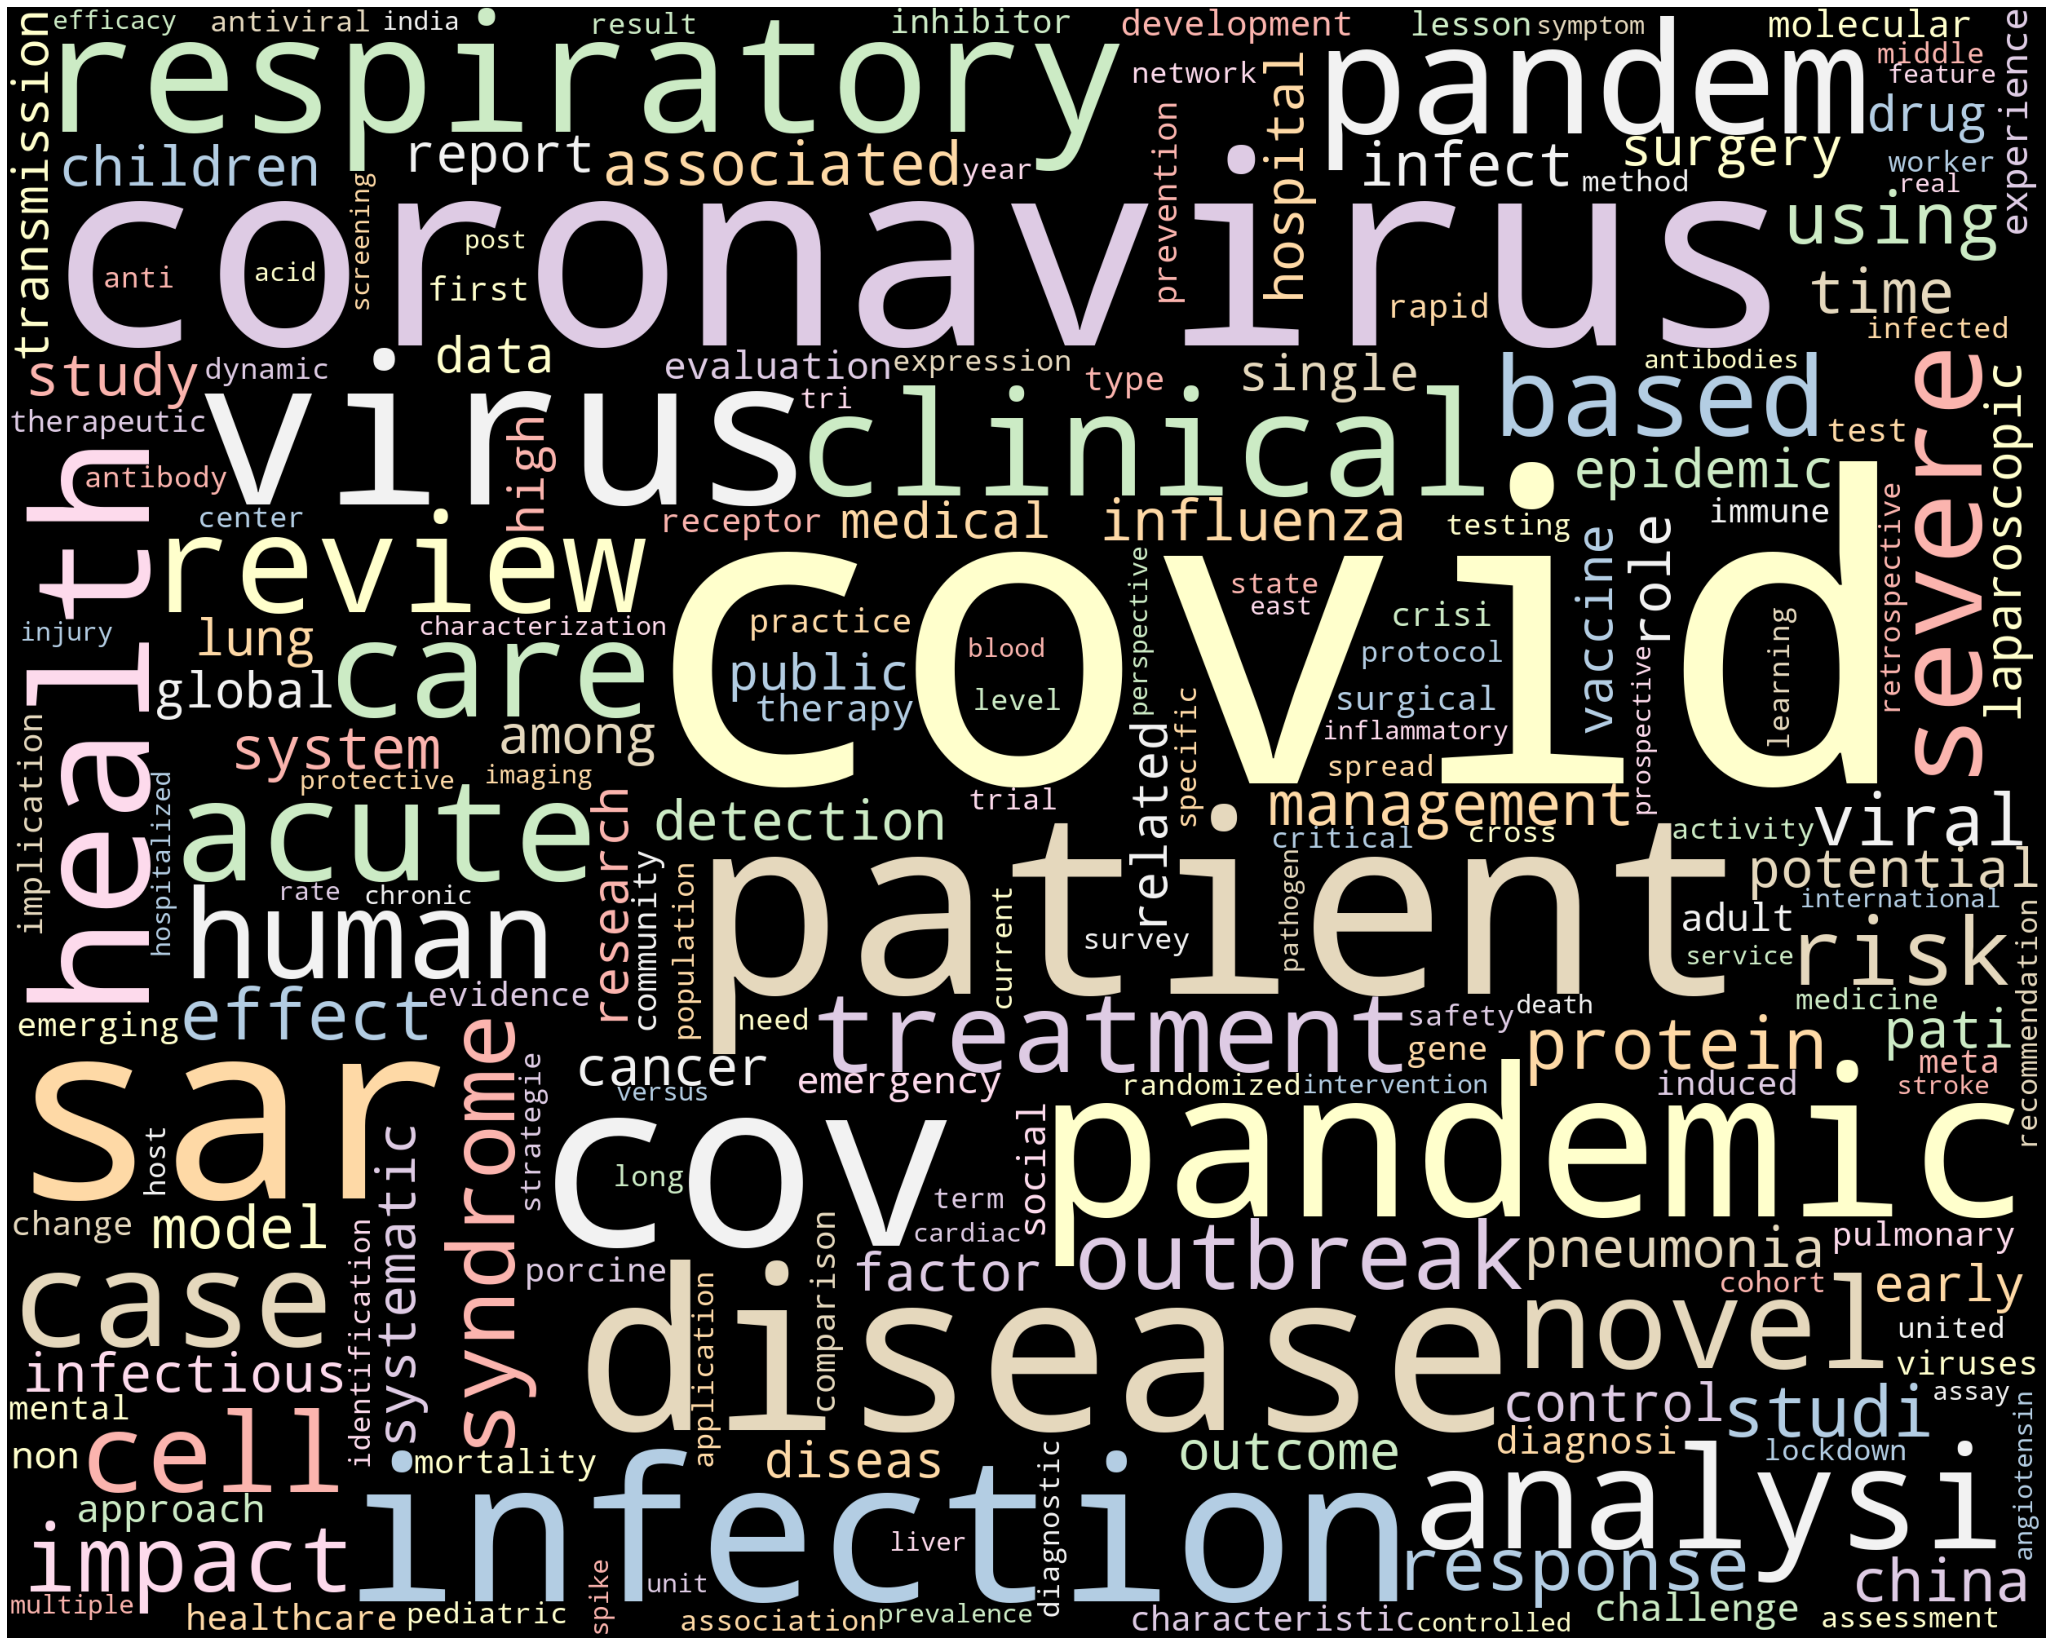

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 2500, height = 2000, random_state=5, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(clo)
# Plot
plot_cloud(wordcloud)

In [ ]:
def f(n):
  if n == 0:
    return(1)
  if n == 1:
    return(1)
  return(f(n-1)+f(n-2))

print(f(5))

8
